In [1]:
import qutip as qt
import numpy as np
import lmfit as lm
import matplotlib.pyplot as plt
from lmfit import Model
#_ = %precision 3

In [2]:
num_basis = 8
π = np.pi

### Vacuum State

In [3]:
g_state = qt.basis(num_basis, 0)

### Generate Coherent State
$|\alpha\rangle = D(\alpha)|0\rangle$

$D(\alpha) |\psi\rangle = e^{\alpha a^\dagger - \alpha^* a} |\psi\rangle$

In [4]:
def generate_state(alpha):
    return qt.displace(num_basis, alpha)*g_state
generate_state(1j)

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.60653066+0.j        ]
 [ 0.        +0.60653068j]
 [-0.4288817 +0.j        ]
 [ 0.        -0.247617j  ]
 [ 0.12379568+0.j        ]
 [ 0.        +0.05542986j]
 [-0.02233779+0.j        ]
 [ 0.        -0.00951754j]]

### $\hat a, \hat x, \hat p$

In [5]:
a = qt.destroy(num_basis)
adag = a.dag()

x = (a+a.dag())
p = (1j)*(a.dag()-a)

In [9]:
p

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.+0.j         0.-1.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.+1.j         0.+0.j         0.-1.41421356j 0.+0.j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+1.41421356j 0.+0.j         0.-1.73205081j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+1.73205081j 0.+0.j
  0.-2.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+2.j
  0.+0.j         0.-2.23606798j 0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+2.23606798j 0.+0.j         0.-2.44948974j 0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+2.44948974j 0.+0.j         0.-2.64575131j]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.j      

$\alpha(t) = e^{-i\omega t}\alpha(0)$

In [33]:
omega = 1
def alpha_t(alpha0, t):
    return np.exp(-1j*omega*t)*alpha0

def compare_states(state1, state2):
    return qt.fidelity(state1, state2)

### Sanity Check 1

In [34]:
times = np.linspace(0, 10, 11)
alpha0 = 1j

alphas = []
states = []

for time in times:
    alphas.append(alpha_t(alpha0, time))
    states.append(generate_state(alpha_t(alpha0, time)))
states[3]

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.60653066+0.j        ]
 [ 0.08559361-0.60046083j]
 [-0.41179947-0.11983619j]
 [-0.10204754+0.22561134j]
 [ 0.10446548+0.06642541j]
 [ 0.03604537-0.0421094j ]
 [-0.01475001-0.01677539j]
 [-0.0079629 +0.00521303j]]

In [35]:
for state in states:
    print(qt.expect(x, state))

0.0
1.6828524405850438
1.8184981081678517
0.28222500153483593
-1.5135244699620292
-1.9177465237515112
-0.5588012677450738
1.313903296782107
1.9786112296233196
0.8241931227820428
-1.0879843401837177


In [36]:
omega = 1
alpha0 = 1j

psi0 = qt.coherent(num_basis, alpha0)
H = omega * (adag*a+0.5)

result = qt.mesolve(H, psi0, times)

In [37]:
fids = []
for i in range(0, 11, 1):
    fids.append(compare_states(states[i], result.states[i]))
fids

[1.0000000000000002,
 0.9999999999998892,
 0.9999999999995568,
 0.9999999999990028,
 0.9999999999982275,
 0.9999999999972302,
 0.9999999999960121,
 0.9999999999945719,
 0.9999999999929102,
 0.9999999999910267,
 0.9999999999889221]

## Test 1

In [38]:
omega = 1
alpha0 = 1j
times = np.linspace(0, 20, 201)

psi0 = qt.coherent(num_basis, alpha0)
H = omega*(adag*a)

result = qt.mesolve(H, psi0, times)

In [39]:
expect_x = []
for state in result.states:
    expect_x.append(qt.expect(x, state))

Text(0.5, 1.0, 'Harmonic Oscillator')

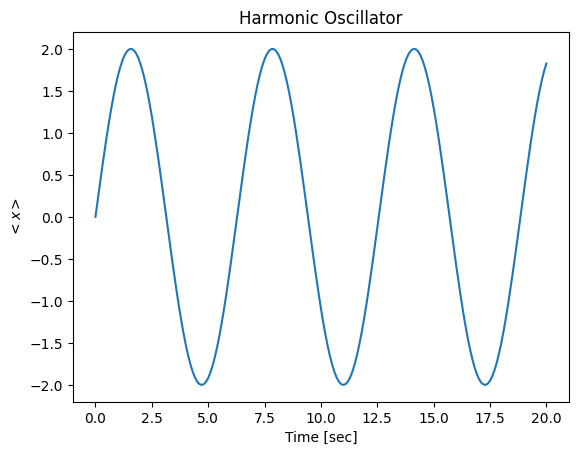

In [40]:
fig = plt.figure()
plt.plot(times, expect_x)
plt.ylabel('$<x>$')
plt.xlabel('Time [sec]')
plt.title('Harmonic Oscillator')

## Test 2

$H = \omega_0 a^\dagger a$

$L_1 = a,   \gamma_1 = 0.1,  \gamma_{\alpha\ge2} = 0$

$\dot{\rho} = (-i\omega_0 - \frac{\gamma_0}{2})a^\dagger a \rho + 
(i\omega_0 - \frac{\gamma_0}{2}) \rho a^\dagger a + 
\gamma_0 a \rho a^\dagger$

$|\psi_0\rangle = |\alpha\rangle$



https://arxiv.org/pdf/2209.00914.pdf

https://arxiv.org/pdf/2207.04617.pdf

In [41]:
omega = 1
alpha0 = 1j
times = np.linspace(0, 20, 501)

psi0 = qt.coherent(num_basis, alpha0)
H = omega*(adag*a)

gamma = 0.1
c_ops = [np.sqrt(gamma) * a]

result = qt.mesolve(H, psi0, times, c_ops)

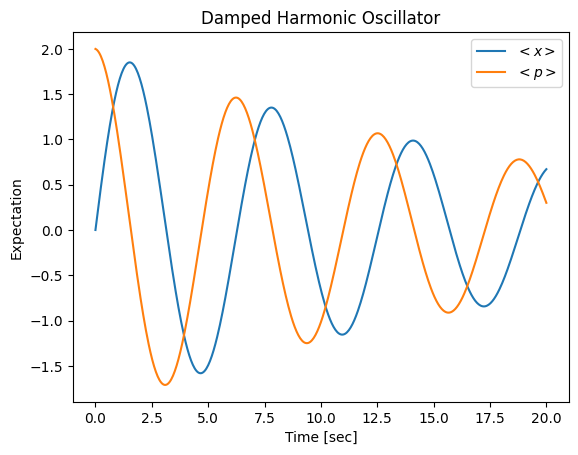

In [42]:
expect_x = []
expect_p = []
var_x = []
var_p = []
for state in result.states:
    expect_x.append(qt.expect(x, state))
    expect_p.append(qt.expect(p, state))
    var_x.append(qt.variance(x, state))
    var_p.append(qt.variance(p, state))

fig = plt.figure()  
plt.plot(times, expect_x, label='$<x>$')
plt.ylabel('Expectation')
plt.xlabel('Time [sec]')
plt.title('Damped Harmonic Oscillator')
plt.plot(times, np.array(expect_p), label='$<p>$')
plt.legend()

In [43]:
def fn(t, A, gamma, omega, delta):
    return (A)*np.exp(-1*(gamma*t))*np.cos(omega*t-delta)

model = Model(fn)
params = model.make_params(A=1, gamma=0.5, omega=omega, delta=2)
result = model.fit(expect_x, params, t=times)

In [44]:
fittedxs = np.array(result.params['A'].value * np.exp(-1*(result.params['gamma'].value*times)) * np.cos(result.params['omega'].value*times-result.params['delta'].value))

Text(0.5, 1.0, 'Compare Fit Result to Simulated Result')

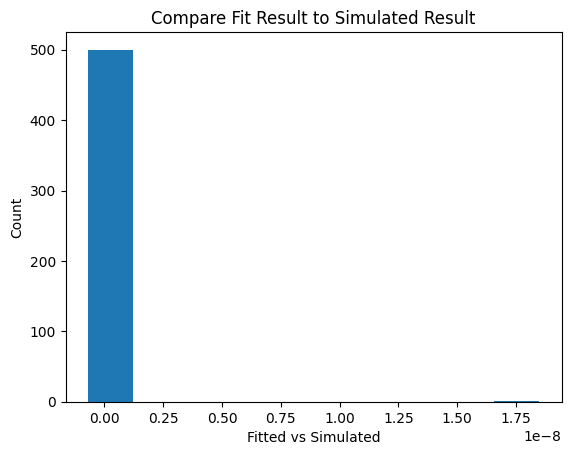

In [45]:
fig = plt.figure()
_ = plt.hist(expect_x-fittedxs)
plt.xlabel('Fitted vs Simulated')
plt.ylabel('Count')
plt.title('Compare Fit Result to Simulated Result')

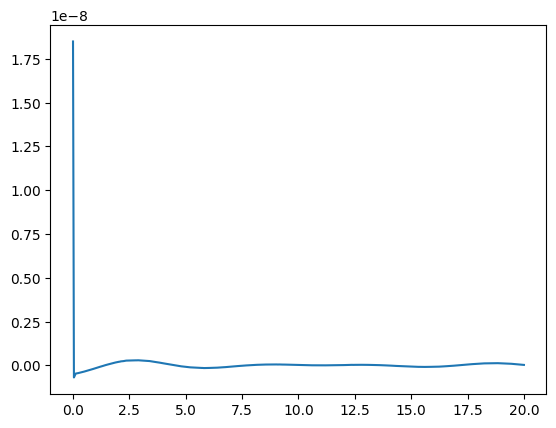

In [46]:
plt.plot(times, expect_x-fittedxs)

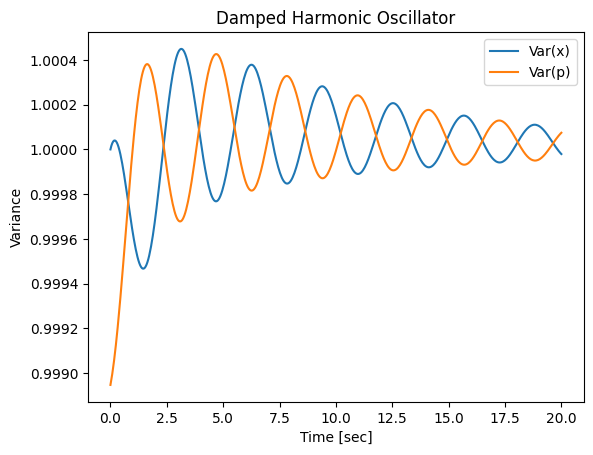

In [47]:
fig = plt.figure()
plt.plot(times, var_x, label='Var(x)')
plt.plot(times, np.array(var_p), label='Var(p)')
plt.ylabel('Variance')
plt.xlabel('Time [sec]')
plt.title('Damped Harmonic Oscillator')
plt.legend()

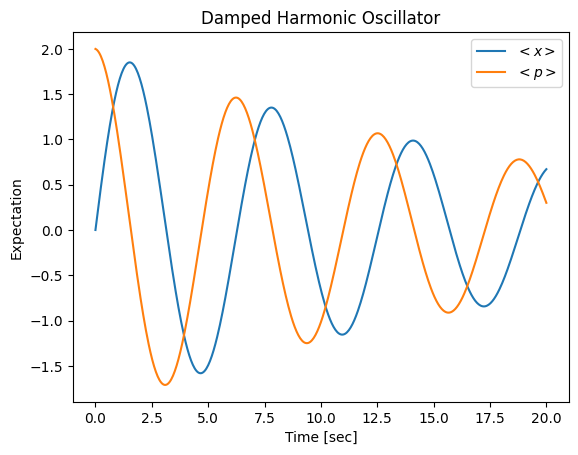

In [49]:
fig = plt.figure()  
plt.plot(times, expect_x, label='$<x>$')
plt.plot(times, np.array(expect_p), label='$<p>$')
plt.ylabel('Expectation')
plt.xlabel('Time [sec]')
plt.title('Damped Harmonic Oscillator')
plt.legend()

In [51]:
var_x

[1.0000000000000002,
 1.0000158672039892,
 1.000027442550483,
 1.0000352470018583,
 1.0000393878913991,
 1.0000399909365685,
 1.0000371996034336,
 1.0000311738793755,
 1.0000220908303514,
 1.000010141845844,
 0.9999955323759737,
 0.9999784793546354,
 0.9999592129374775,
 0.9999379698138174,
 0.9999149961370912,
 0.9998905438333585,
 0.9998648711034999,
 0.9998382373399561,
 0.9998109036635854,
 0.9997831337100085,
 0.9997551858885936,
 0.999727317491236,
 0.999699780546035,
 0.9996728219416102,
 0.9996466786074594,
 0.9996215788301424,
 0.9995977416974409,
 0.9995753744160236,
 0.9995546702861242,
 0.9995358087224515,
 0.9995189547028378,
 0.9995042563413441,
 0.9994918470544167,
 0.9994818409792141,
 0.9994743353383333,
 0.9994694087451141,
 0.9994671216293161,
 0.9994675149798344,
 0.9994706118666503,
 0.9994764154021776,
 0.9994849107006702,
 0.9994960645820634,
 0.9995098255166797,
 0.9995261248332805,
 0.9995448766277262,
 0.9995659787864564,
 0.9995893143007692,
 0.99961475209376

In [ ]:
np.argwhere(arr == np.min(arr)).flatten()




In [54]:
var_x.(var_x == np.min(var_x))

SyntaxError: invalid syntax (3265920828.py, line 1)

In [55]:
np.min(var_x)

0.9994671216293161